In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F          
from torch.utils.data import DataLoader  
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transform = transforms.ToTensor()


In [3]:
train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
type(train_data)


torchvision.datasets.mnist.MNIST

In [6]:
train_data[0]


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [7]:
type(train_data[0])


tuple

In [8]:
image,label = train_data[0]


In [9]:
image.shape


torch.Size([1, 28, 28])

In [10]:
label


5

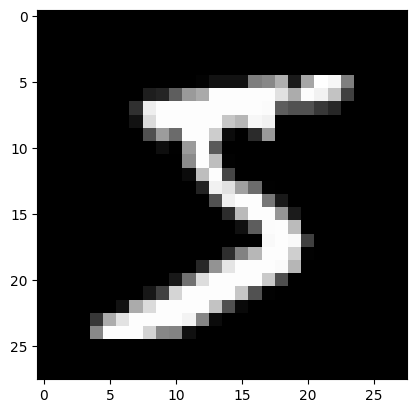

In [11]:
plt.imshow(image.reshape((28,28)),cmap='gray')  
plt.show()

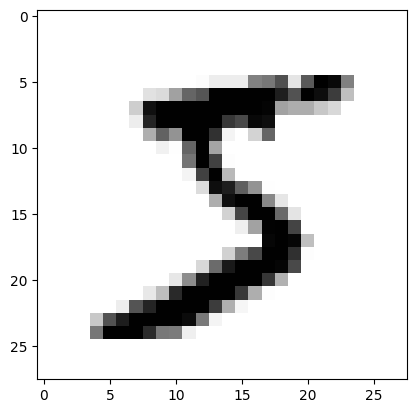

In [12]:
plt.imshow(image.reshape((28,28)),cmap='gist_yarg')  
plt.show()

In [13]:
torch.manual_seed(101)  # for consistent results

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [14]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) 

In [15]:
for images,labels in train_loader: 
    break

In [16]:
images.shape

torch.Size([100, 1, 28, 28])

In [17]:
labels.shape


torch.Size([100])

In [18]:
print('Labels: ', labels[:12].numpy())

Labels:  [   7    2    3    5    8    5    3    6    9    9    1    3]


In [19]:
im = make_grid(images[:12], nrow=12)

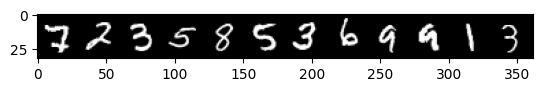

In [20]:
plt.imshow(np.transpose(im.numpy(),(1,2,0)));
plt.show()

In [21]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=784, out_sz=10, layers=[120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
    
    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [22]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [23]:
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [25]:
images.shape

torch.Size([100, 1, 28, 28])

In [26]:
images.view(100,-1)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [27]:
images.view(100,-1).shape

torch.Size([100, 784])

In [28]:
import time 
start_time = time.time()

# Training 

epochs = 10 

# Trackers 
train_losses = []
test_losses = []
train_correct = []
test_correct = []





for i in range(epochs):

    trn_corr = 0
    tst_corr = 0

    for b,(X_train,y_train) in enumerate(train_loader):

        b+=1

        y_pred = model(X_train.view(100,-1))
        loss = criterion(y_pred,y_train)


        # 10 Neurons
        # [0.1, 0.0, .... 0.8]
        predicted = torch.max(y_pred.data,1)[1]   # print(y_pred.data)
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b%200 == 0:

            acc = trn_corr.item()*100/(100*b)
            print(f'Epoch{i}  batch {b}   loss: {loss.item()}  accuracy:{acc}')


    train_losses.append(loss)
    train_correct.append(trn_corr)

    with torch.no_grad():
        for b, (X_test,y_test) in enumerate(test_loader):
            y_val = model(X_test.view(500,-1))
            predicted = torch.max(y_val.data,1)[1]
            tst_corr += (predicted ==y_test).sum()

    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)






total_time = time.time() - start_time
print(f'Durations: {total_time/60} mins')

Epoch0  batch 200   loss: 0.2356237769126892  accuracy:83.245
Epoch0  batch 400   loss: 0.35328561067581177  accuracy:87.5325
Epoch0  batch 600   loss: 0.13676534593105316  accuracy:89.57833333333333
Epoch1  batch 200   loss: 0.24926891922950745  accuracy:94.845
Epoch1  batch 400   loss: 0.14819082617759705  accuracy:95.0775
Epoch1  batch 600   loss: 0.0759022906422615  accuracy:95.36
Epoch2  batch 200   loss: 0.08559083193540573  accuracy:96.525
Epoch2  batch 400   loss: 0.06260614842176437  accuracy:96.63
Epoch2  batch 600   loss: 0.06595370173454285  accuracy:96.72
Epoch3  batch 200   loss: 0.11056313663721085  accuracy:97.68
Epoch3  batch 400   loss: 0.05538257956504822  accuracy:97.52
Epoch3  batch 600   loss: 0.03211202099919319  accuracy:97.51833333333333
Epoch4  batch 200   loss: 0.11016435921192169  accuracy:98.13
Epoch4  batch 400   loss: 0.0443524606525898  accuracy:98.0125
Epoch4  batch 600   loss: 0.05200694873929024  accuracy:98.02333333333333
Epoch5  batch 200   loss: 0.

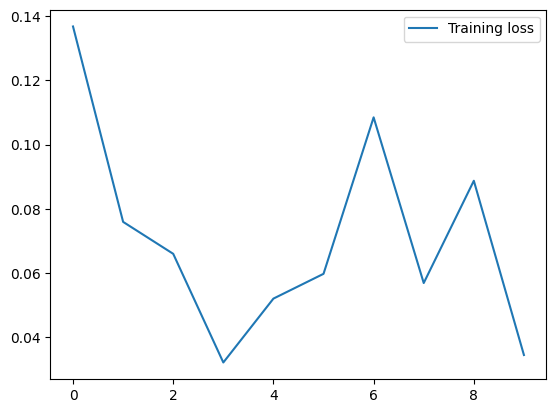

In [29]:
train_losses_np = [loss.detach().numpy() for loss in train_losses]

plt.plot(train_losses_np, label='Training loss')
plt.legend()
plt.show()

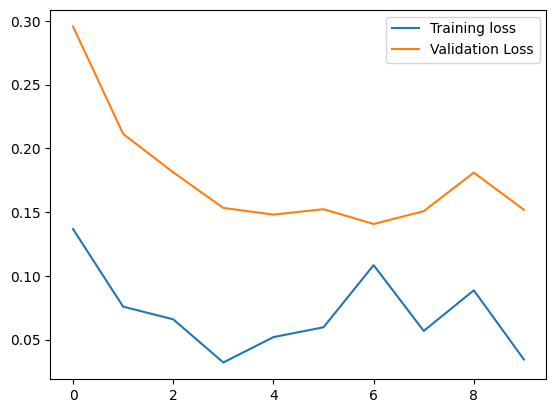

In [30]:
train_losses_np = [loss.detach().numpy() for loss in train_losses]
test_losses_np = [loss.detach().numpy() for loss in test_losses]
plt.plot(train_losses_np, label='Training loss')
plt.plot(test_losses_np, label='Validation Loss')
plt.legend()
plt.show()

In [31]:
train_correct


[tensor(53747),
 tensor(57216),
 tensor(58032),
 tensor(58511),
 tensor(58814),
 tensor(59024),
 tensor(59209),
 tensor(59379),
 tensor(59455),
 tensor(59580)]

In [32]:
train_correct

[tensor(53747),
 tensor(57216),
 tensor(58032),
 tensor(58511),
 tensor(58814),
 tensor(59024),
 tensor(59209),
 tensor(59379),
 tensor(59455),
 tensor(59580)]

In [33]:
train_correct[0]/600


tensor(89.5783)

In [34]:
train_acc = [t/600 for t in train_correct]


In [35]:
train_acc


[tensor(89.5783),
 tensor(95.3600),
 tensor(96.7200),
 tensor(97.5183),
 tensor(98.0233),
 tensor(98.3733),
 tensor(98.6817),
 tensor(98.9650),
 tensor(99.0917),
 tensor(99.3000)]

In [36]:
test_acc = [t/100 for t in test_correct]


In [37]:
test_acc


[tensor(94.3800),
 tensor(95.8900),
 tensor(96.9300),
 tensor(97.0500),
 tensor(97.5100),
 tensor(97.6600),
 tensor(97.7000),
 tensor(97.7100),
 tensor(97.5900),
 tensor(97.6900)]

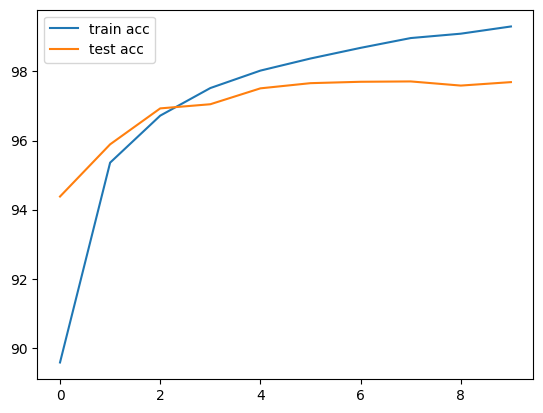

In [38]:
plt.plot(train_acc,label='train acc')
plt.plot(test_acc,label='test acc')
plt.legend()
plt.show()

In [39]:
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)


In [40]:
with torch.no_grad():
    correct = 0
    
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

In [41]:
100*correct.item()/len(test_data)


97.69

In [42]:
confusion_matrix(predicted.view(-1), y_test.view(-1))


array([[ 973,    0,    5,    0,    2,    2,    5,    4,    4,    2],
       [   0, 1122,    3,    0,    0,    1,    3,    7,    0,    2],
       [   0,    3, 1001,    3,    1,    0,    1,   13,    4,    0],
       [   1,    3,    6,  993,    0,   10,    1,    2,    3,    1],
       [   1,    0,    3,    0,  965,    2,    3,    3,    3,    7],
       [   0,    0,    0,    5,    0,  864,    3,    1,    3,    3],
       [   1,    2,    2,    0,    5,    5,  941,    1,    1,    0],
       [   0,    0,    3,    2,    0,    0,    0,  971,    2,    0],
       [   3,    5,    9,    3,    0,    6,    1,    3,  949,    4],
       [   1,    0,    0,    4,    9,    2,    0,   23,    5,  990]],
      dtype=int64)